In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.metrics import *
import pandas as pd
import numpy as np
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
train=pd.read_csv('overfittrain.csv')
test=pd.read_csv('overfittest.csv')

In [4]:
train.head(10)

,input1,input2,input3,input4,input5,target
0,7.0,5.0,7.0,7.00,1.5,1
1,54.0,57.0,55.0,27.50,114.0,36
2,9.0,12.0,10.0,5.00,24.0,6
3,52.5,55.5,53.5,26.75,111.0,35
4,4.0,11.0,5.0,45.00,12.0,2
5,45.0,4.0,4.0,7.00,1.0,7
6,7.5,10.5,8.5,4.25,21.0,5
7,36.0,39.0,37.0,18.50,78.0,24
8,54.0,57.0,55.0,27.50,114.0,36
9,73.5,76.5,74.5,37.25,153.0,49


In [5]:
train.corr()

,input1,input2,input3,input4,input5,target
input1,1.000000,0.894441,0.814930,0.113240,0.958105,0.961522
input2,0.894441,1.000000,0.752368,0.100058,0.894043,0.887137
input3,0.814930,0.752368,1.000000,0.077787,0.832580,0.826593
input4,0.113240,0.100058,0.077787,1.000000,0.102200,0.138107
input5,0.958105,0.894043,0.832580,0.102200,1.000000,0.968234
target,0.961522,0.887137,0.826593,0.138107,0.968234,1.000000


In [6]:
X_train=train.iloc[:,:-1]
X_test=test.iloc[:,:-1]
y_train=train.iloc[:,-1]
y_test=test.iloc[:,-1]

In [7]:
model=LinearRegression()

In [8]:
model.fit(X_train,y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)
y_pred_trains = model.predict(X_train)

In [10]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred}).head(10)
df

,Actual,Predicted
0,54,47.391544
1,65,57.050430
2,70,61.440832
3,70,61.440832
4,52,45.635383
5,92,80.758603
6,53,46.513464
7,73,64.075074
8,61,53.538108
9,88,77.246281


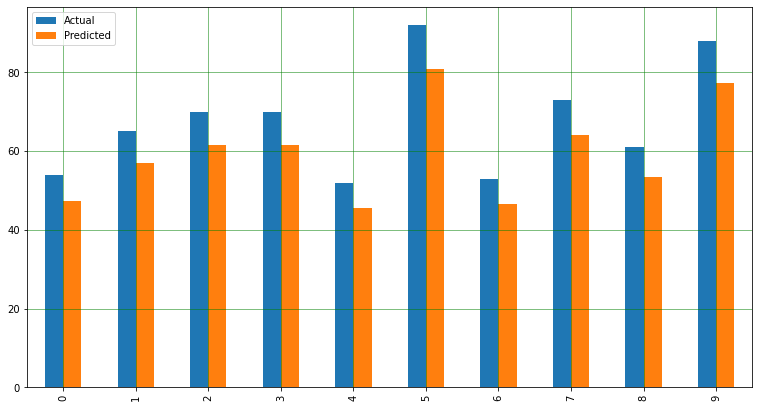

In [11]:
df.plot(kind='bar',figsize=(13,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [12]:
#R2 score on train data

n = X_train.shape[0]
p = X_train.shape[1]
r2 = r2_score(y_train, y_pred_trains)
print('R^2:' , r2)
print('Adjusted R^2 :' , 1-(1-r2)*(n-1)/(n-p-1))
print('Mean Absolute Error:' , mean_absolute_error(y_train, y_pred_trains))
print('Mean Squared Error:' , mean_squared_error(y_train, y_pred_trains))
print('Root Mean Squared Error:' , np.sqrt(mean_squared_error(y_train, y_pred_trains)))

R^2: 0.9533433466614624
Adjusted R^2 : 0.9531086552462785
Mean Absolute Error: 0.961819692069944
Mean Squared Error: 9.40660646554726
Root Mean Squared Error: 3.067019149850105


In [13]:
#R2 score on test data

n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
print('R^2:' , r2)
print('Adjusted R^2 :' , 1-(1-r2)*(n-1)/(n-p-1))
print('Mean Absolute Error:' , mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:' , mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:' , np.sqrt(mean_squared_error(y_test, y_pred)))

R^2: 0.5853773941881704
Adjusted R^2 : 0.5768810293149771
Mean Absolute Error: 8.995151836843103
Mean Squared Error: 83.92136678220125
Root Mean Squared Error: 9.160860591789467


In [14]:
model=Lasso(alpha=-3.9)

In [15]:
model.fit(X_train,y_train)

Lasso(alpha=-3.9)

In [16]:
y_pred = model.predict(X_test)
y_pred_trains = model.predict(X_train)

In [17]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred}).head(10)
df

,Actual,Predicted
0,54,54.936259
1,65,66.181242
2,70,71.292598
3,70,71.292598
4,52,52.891717
5,92,93.782563
6,53,53.913988
7,73,74.359411
8,61,62.092157
9,88,89.693478


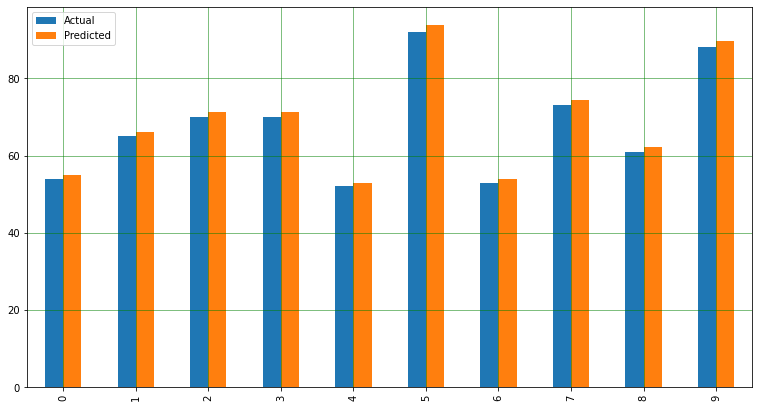

In [18]:
df.plot(kind='bar',figsize=(13,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [19]:
#R2 score on train data

n = X_train.shape[0]
p = X_train.shape[1]
r2 = r2_score(y_train, y_pred_trains)
print('R^2:' , r2)
print('Adjusted R^2 :' , 1-(1-r2)*(n-1)/(n-p-1))
print('Mean Absolute Error:' , mean_absolute_error(y_train, y_pred_trains))
print('Mean Squared Error:' , mean_squared_error(y_train, y_pred_trains))
print('Root Mean Squared Error:' , np.sqrt(mean_squared_error(y_train, y_pred_trains)))

R^2: 0.9526086525196978
Adjusted R^2 : 0.9523702654599377
Mean Absolute Error: 0.8510122991510984
Mean Squared Error: 9.554730648693814
Root Mean Squared Error: 3.091072734293681


In [20]:
#R2 score on test data

n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
print('R^2:' , r2)
print('Adjusted R^2 :' , 1-(1-r2)*(n-1)/(n-p-1))
print('Mean Absolute Error:' , mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:' , mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:' , np.sqrt(mean_squared_error(y_test, y_pred)))

R^2: 0.9902006309823388
Adjusted R^2 : 0.9899998242401736
Mean Absolute Error: 1.3722392189978432
Mean Squared Error: 1.9834336817093636
Root Mean Squared Error: 1.4083443051006255


In [21]:
data=pd.read_csv('overfitdata.csv')

In [22]:
X_train = data.iloc[:, :-1]
y_train = data.iloc[:,-1]

In [23]:
X_test = [0,1,2,3,4]
alpha = [1,2,3,4]

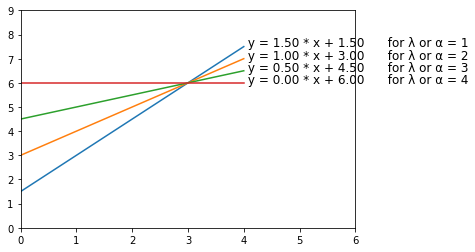

In [24]:
for l in alpha:
    model = Lasso(alpha=l)
    model.fit(X_train, y_train)

    model_coeff = model.coef_
    model_intercept = model.intercept_
    y_pred = model.predict(pd.DataFrame(X_test))
    
    plt.figure(2)       
    plt.plot(X_test, y_pred)
    plt.ylim(ymin=0, ymax=9)
    plt.xlim(xmin=0, xmax=6)
    plt.text(X_test[-1], y_pred[-1],  
             ' y = ' + 
             str('%.2f' %model_coeff) +
             ' * x' + 
             ' + ' + 
             str('%.2f' %model_intercept) +
             '      for \u03BB or \u03B1 = ' + str(l), fontsize=12)

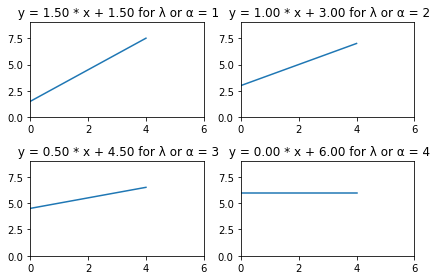

In [25]:
for i, l in enumerate(alpha):
    model = Lasso(alpha=l)
    model.fit(X_train, y_train)

    model_coeff = model.coef_
    model_intercept = model.intercept_
    y_pred = model.predict(pd.DataFrame(X_test))

    plt.figure(1)    
    plt.subplot(2,2,i+1)
    plt.plot(X_test, y_pred)
    plt.ylim(ymin=0, ymax=9)
    plt.xlim(xmin=0, xmax=6)
    plt.title(' y = ' + 
             str('%.2f' %model_coeff) +
             ' * x' + 
             ' + ' + 
             str('%.2f' %model_intercept) +
             ' for \u03BB or \u03B1 = ' + str(l), fontsize=12)
    plt.tight_layout()